In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_r

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

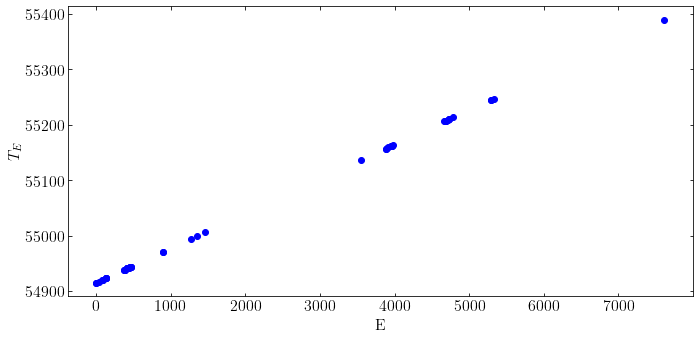

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

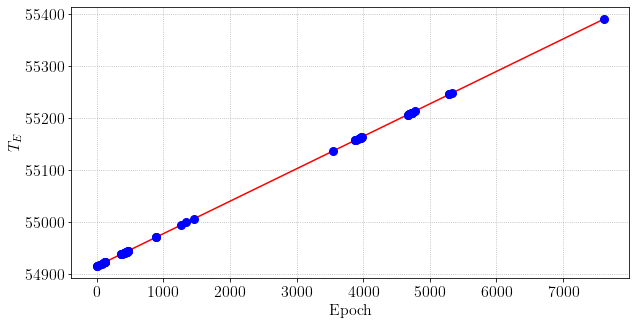

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

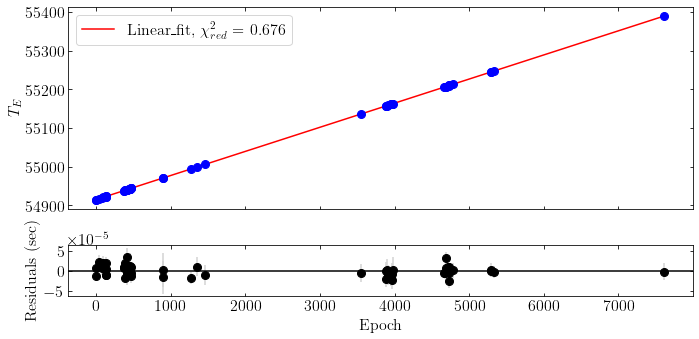

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(50000, 66000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 50000.00000
1 50161.61616
2 50323.23232
3 50484.84848
4 50646.46465
5 50808.08081
6 50969.69697
7 51131.31313
8 51292.92929
9 51454.54545
10 51616.16162
11 51777.77778
12 51939.39394
13 52101.01010
14 52262.62626
15 52424.24242
16 52585.85859
17 52747.47475
18 52909.09091
19 53070.70707
20 53232.32323
21 53393.93939
22 53555.55556
23 53717.17172
24 53878.78788
25 54040.40404
26 54202.02020
27 54363.63636
28 54525.25253
29 54686.86869
30 54848.48485
31 55010.10101
32 55171.71717
33 55333.33333
34 55494.94949
35 55656.56566
36 55818.18182
37 55979.79798
38 56141.41414
39 56303.03030
40 56464.64646
41 56626.26263
42 56787.87879
43 56949.49495
44 57111.11111
45 57272.72727
46 57434.34343
47 57595.95960
48 57757.57576
49 57919.19192
50 58080.80808
51 58242.42424
52 58404.04040
53 58565.65657
54 58727.27273
55 58888.88889
56 59050.50505
57 59212.12121
58 59373.73737
59 59535.35354
60 59696.96970
61 59858.58586
62 60020.20202
63 60181.81818
64 60343.43434
65 60505.05051
66 60666.66667
67 60

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39  
#e = 0
w = -1.36           
tau = 53000   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("tau_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.43881 4.11611 56167.60315 56141.61722 25.98593
50161.61616 4.53817 4.19853 56326.62964 56303.23338 23.39626
50323.23232 4.63753 4.28294 56485.51976 56464.84954 20.67022
50484.84848 4.73689 4.36958 56644.28010 56626.46570 17.81440
50646.46465 4.83625 4.45873 56802.91912 56788.08187 14.83725
50808.08081 4.93561 4.55070 56961.44772 56949.69803 11.74968
50969.69697 5.03497 4.64583 57119.88003 57111.31419 8.56584
51131.31313 5.13433 4.74453 57278.23451 57272.93035 5.30416
51292.92929 5.23369 4.84723 57436.53523 57434.54651 1.98871
51454.54545 5.33305 4.95442 57594.81367 57596.16267 -1.34900
51616.16162 5.43241 5.06663 57753.11105 57757.77884 -4.66779
51777.77778 5.53177 5.18442 57911.48101 57919.39500 -7.91399
51939.39394 5.63113 5.30837 58069.99290 58081.01116 -11.01826
52101.01010 5.73049 5.43899 58228.73483 58242.62732 -13.89249
52262.62626 5.82985 5.57667 58387.81570 58404.24348 -16.42778
52424.24242 5.92921 5.72149

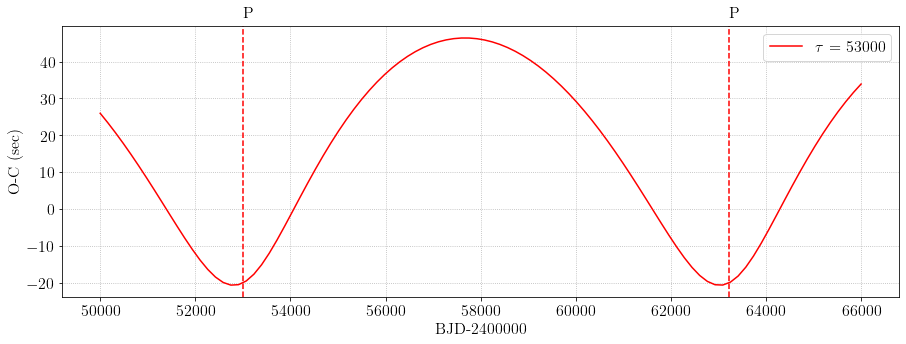

In [16]:
InputFile_out = "tau_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\tau$ = 53000')

plt.axvline(x=float(53000), color='r', linestyle='--')
plt.axvline(x=float(53000+P), color='r', linestyle='--')

plt.text(float(53000), 52, 'P')
plt.text(float(53000+P), 52, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53100   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("tau_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.37733 4.06600 56169.13495 56141.61722 27.51773
50161.61616 4.47669 4.14731 56328.24847 56303.23338 25.01509
50323.23232 4.57605 4.23047 56487.22229 56464.84954 22.37275
50484.84848 4.67541 4.31569 56646.06206 56626.46570 19.59636
50646.46465 4.77477 4.40326 56804.77505 56788.08187 16.69317
50808.08081 4.87413 4.49344 56963.37052 56949.69803 13.67249
50969.69697 4.97349 4.58657 57121.86053 57111.31419 10.54634
51131.31313 5.07285 4.68302 57280.26072 57272.93035 7.33037
51292.92929 5.17221 4.78319 57438.59150 57434.54651 4.04499
51454.54545 5.27157 4.88754 57596.87954 57596.16267 0.71687
51616.16162 5.37093 4.99657 57755.15975 57757.77884 -2.61910
51777.77778 5.47029 5.11084 57913.47768 57919.39500 -5.91732
51939.39394 5.56965 5.23092 58071.89262 58081.01116 -9.11854
52101.01010 5.66901 5.35736 58230.48071 58242.62732 -12.14661
52262.62626 5.76837 5.49064 58389.33788 58404.24348 -14.90560
52424.24242 5.86773 5.63105 

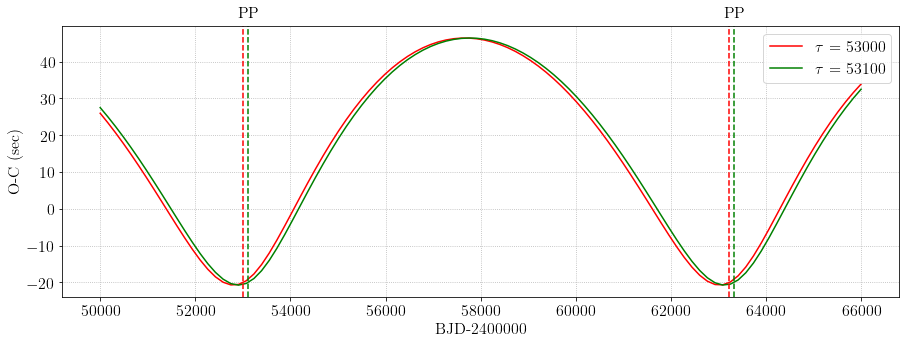

In [18]:
InputFile_out = "tau_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\tau$ = 53000')
plt.plot(x_b, y_b, '-', color='green',label=r'$\tau$ = 53100')

plt.axvline(x=float(53000), color='r', linestyle='--')
plt.axvline(x=float(53000+P), color='r', linestyle='--')

plt.text(float(53000-100), 52, 'P')
plt.text(float(53000+P-100), 52, 'P')

plt.axvline(x=float(53100), color='g', linestyle='--')
plt.axvline(x=float(53100+P), color='g', linestyle='--')

plt.text(float(53100), 52, 'P')
plt.text(float(53100+P), 52, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53200   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("tau_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.31585 4.01652 56170.61152 56141.61722 28.99430
50161.61616 4.41521 4.09680 56329.81379 56303.23338 26.58041
50323.23232 4.51457 4.17879 56488.87347 56464.84954 24.02393
50484.84848 4.61393 4.26270 56647.79544 56626.46570 21.32974
50646.46465 4.71329 4.34879 56806.58593 56788.08187 18.50406
50808.08081 4.81265 4.43731 56965.25287 56949.69803 15.55484
50969.69697 4.91201 4.52858 57123.80654 57111.31419 12.49235
51131.31313 5.01137 4.62293 57282.26024 57272.93035 9.32989
51292.92929 5.11073 4.72075 57440.63126 57434.54651 6.08475
51454.54545 5.21009 4.82245 57598.94220 57596.16267 2.77953
51616.16162 5.30945 4.92853 57757.22262 57757.77884 -0.55622
51777.77778 5.40881 5.03949 57915.51115 57919.39500 -3.88385
51939.39394 5.50817 5.15591 58073.85824 58081.01116 -7.15292
52101.01010 5.60753 5.27834 58232.32918 58242.62732 -10.29814
52262.62626 5.70689 5.40734 58391.00741 58404.24348 -13.23607
52424.24242 5.80625 5.54332 

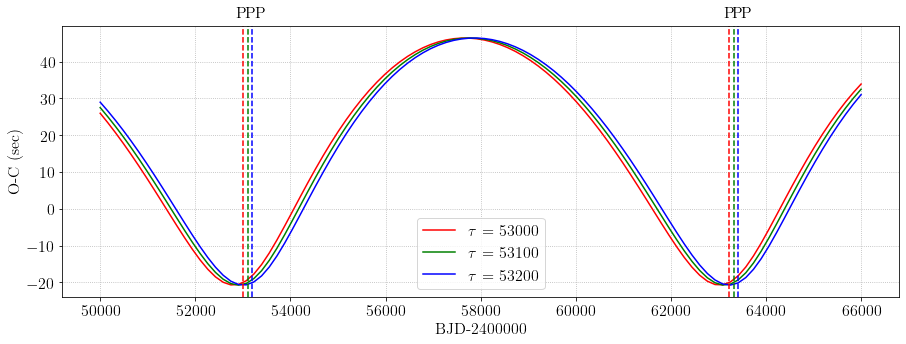

In [20]:
InputFile_out = "tau_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\tau$ = 53000')
plt.plot(x_b, y_b, '-', color='green',label=r'$\tau$ = 53100')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\tau$ = 53200')

plt.axvline(x=float(53000), color='r', linestyle='--')
plt.axvline(x=float(53000+P), color='r', linestyle='--')

plt.text(float(53000-150), 52, 'P')
plt.text(float(53000+P-100), 52, 'P')

plt.axvline(x=float(53100), color='g', linestyle='--')
plt.axvline(x=float(53100+P), color='g', linestyle='--')

plt.text(float(53100-50), 52, 'P')
plt.text(float(53100+P-25), 52, 'P')

plt.axvline(x=float(53200), color='b', linestyle='--')
plt.axvline(x=float(53200+P), color='b', linestyle='--')

plt.text(float(53200+50), 52, 'P')
plt.text(float(53200+P+50), 52, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53300   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("tau_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.25437 3.96762 56172.03200 56141.61722 30.41478
50161.61616 4.35373 4.04694 56331.32451 56303.23338 28.09112
50323.23232 4.45309 4.12784 56490.47190 56464.84954 25.62236
50484.84848 4.55245 4.21054 56649.47844 56626.46570 23.01274
50646.46465 4.65181 4.29525 56808.34947 56788.08187 20.26760
50808.08081 4.75117 4.38223 56967.09180 56949.69803 17.39377
50969.69697 4.85053 4.47177 57125.71420 57111.31419 14.40001
51131.31313 4.94989 4.56417 57284.22800 57272.93035 11.29765
51292.92929 5.04925 4.65979 57442.64788 57434.54651 8.10137
51454.54545 5.14861 4.75904 57600.99299 57596.16267 4.83032
51616.16162 5.24797 4.86235 57759.28837 57757.77884 1.50953
51777.77778 5.34733 4.97023 57917.56675 57919.39500 -1.82825
51939.39394 5.44669 5.08320 58075.87092 58081.01116 -5.14024
52101.01010 5.54605 5.20185 58234.25660 58242.62732 -8.37072
52262.62626 5.64542 5.32672 58392.79566 58404.24348 -11.44782
52424.24242 5.74478 5.45834 5

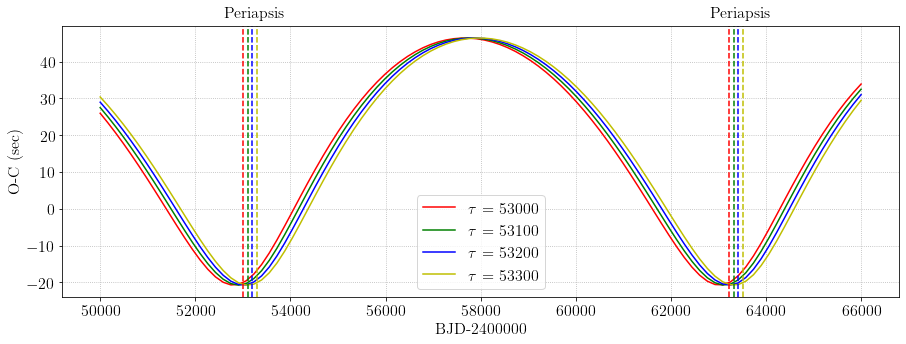

In [22]:
InputFile_out = "tau_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\tau$ = 53000')
plt.plot(x_b, y_b, '-', color='green',label=r'$\tau$ = 53100')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\tau$ = 53200')
plt.plot(x_d, y_d, '-', color='y',label=r'$\tau$ = 53300')

plt.axvline(x=float(53000), color='r', linestyle='--')
plt.axvline(x=float(53000+P), color='r', linestyle='--')

#plt.text(float(53000-150), 52, 'P')
#plt.text(float(53000+P-100), 52, 'P')

plt.axvline(x=float(53100), color='g', linestyle='--')
plt.axvline(x=float(53100+P), color='g', linestyle='--')

plt.text(float(53100-500), 52, 'Periapsis')
plt.text(float(53100+P-500), 52, 'Periapsis')

plt.axvline(x=float(53200), color='b', linestyle='--')
plt.axvline(x=float(53200+P), color='b', linestyle='--')

#plt.text(float(53200+50), 52, 'P')
#plt.text(float(53200+P+50), 52, 'P')

plt.axvline(x=float(53300), color='y', linestyle='--')
plt.axvline(x=float(53300+P), color='y', linestyle='--')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_tau2_rev3.pdf", format='pdf', dpi=1200)
plt.show()